
# Introduction

We will start working with **continuous random variables and probability distributions** for experiments fulfilling specific conditions.  

A **continous probability distribution** is an equation that connects each possible value of a continous random variable with its probability of occurrence.

Again, we have some **sub-types** of continous random distributions.

##Sub-types
Every sub-type of a random variable is the number of sucesses that result from a particular type of experiment. 


Today, we will first work with **two types of experiments** in order to better understand what makes a random variable **(1)uniformly or (2) exponentially distributed.** This will cover chapter 5 in your book.


#1. Tending the Guf og Kugler store

###Experiment 1 - Time to Wee

Every three minute (180 sec) on average, a customer enters **Guf & Kugler**. 

Lone is tending the store alone. From time to time, she needs to go to the bathroom. What is the probability that a customer will show up in the next 20 seconds or less that it takes Lone to wee?

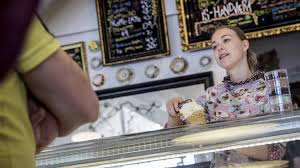

##Theoretical conditions

1.   Uniform distributions are probability distributions with equally likely outcomes.
2.   The uniform distribution can be visualized as a straight horizontal line.



##Probability?

###Uniform distribution 
A probability distribution where every continuous value between an interval from a to b is equally likely to be chosen:

$$f(x) = \frac{1}{b-a}$$

for $$a < x < b$$

or  $$a ≤ x ≤ b$$

Let's plug in the numbers:

$x=20$

$a = 0$

$b =180$

$$P(0 ≤ x ≤ 20) = (base)(height)  = (20-0)\frac{1}{180} =0.111$$


In [ ]:
#let's check our math using python

from scipy.stats import uniform

#where:

#x: The random value 
#loc: The minimum possible value
#loc + scale: The maximum possible value

#calculate uniform probability
uniform.cdf(x=20, loc=0, scale=180) - uniform.cdf(x=0, loc=0, scale=180)



0.1111111111111111

###Experiment 1.2 - Windows to wee...

Now lets assume that the rate of customers change a bit in **Guf & Kugler** during the day. 

For example, in the early hours, 10-13:00, a customer only comes in every 5 minutes, as opposed to every 3 minutes from 13 - 15:00, and 1.5 minutes during peak afternoon hours from 15 - 17:00.





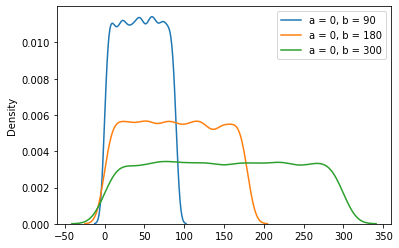

In [ ]:

# Creating different probability distributions for different time intervals between customers.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


size = 10000
#plotting 10000 sample from 
#different uniform distribution
sns.kdeplot(np.random.uniform(0, 90, size))
sns.kdeplot(np.random.uniform(0, 180, size))
sns.kdeplot(np.random.uniform(0, 300, size))

plt.legend(["a = 0, b = 90", 
            "a = 0, b = 180", 
            "a = 0, b = 300"])
plt.show()



 

###Your turn...

While most customers will wait for Lone's return, and as such, profits will not be lost, there may be other business scenarios where the different probabilities associated with small absenties can have consequences. Can you think of a business scenario, where this would be the case, and calculate associated probabilities? 

###Experiment 2 - Time with customers

Back to **Guf & Kugler**, here Lone must spend different amounts of time with each customer.  

Lets assume that Lone spends an average of 5 minutes per customer. But she spends less time with more customers and more time with less customers.

 ***Here, we lean on exercises 44 - 53 in chapter 5 of your book*.**


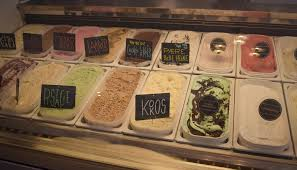

###Theoretical conditions

From the point of view of taking-order time with each customer, it does not matter how long Lone have spent so far on customers. 

If Lone has not chatted with a customer, the distribution of interaction time until the next customer's order is the same as when she started her day. 

We assume that amount spent with each customer can be modelled using the exponential function: $X\sim Exp(0.2)$



###Probability?

What is $m$ in an exponential function? 

What does it represent?

Can we calculate the mean time, Lone spends with customers given this distribution?

$$m = \frac{1}{\mu}$$


$$\mu = \frac{1}{0.2} = 5$$


Can we calculate the standard deviation?

$$\rho = \frac{1}{0.2} = 5$$ 

###Exponential distribution:

μ = historical average (mean)

$\rho = \frac{1}{m}$ (standard deviation)

$e$ = 2.71828 (a numerical constant) 

$$P(x) = me^{-mx}$$

Where 

$$m = \frac{1}{\mu}$$

Therefore, m can be substituted in the original formula:

$$\frac{1}{\mu}e^{-\frac{1}{\mu}x}$$

Now to do any probability calculations we must state the probability density function.

In our case, Lone spends an average of 5 min per customer:

$$p(x) =\frac{1}{5}e^{-\frac{1}{5}x} = 0.2e^{-0.2x}$$ 









Let's graph the distribution.

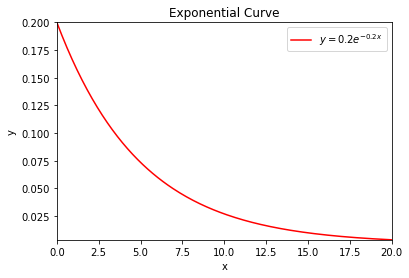

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Here I define P(x) = Ae ^-Bx)

a = 0.2
b = 0.2
x = np.linspace(0, 20, 200, endpoint = True)
y = (a * np.exp(-b*x))

plt.plot(x, y, '-r', label=r'$y = 0.2e^{-0.2x}$')

axes = plt.gca()
axes.set_xlim([x.min(), x.max()])
axes.set_ylim([y.min(), y.max()])

plt.xlabel('x')
plt.ylabel('y')
plt.title('Exponential Curve')
plt.legend(loc='upper right')

plt.show()


Can we find $P (2 < x < 10)$

Yes. To do so, we will use the cumulative distribution function:

$$P(x) = 1 - e^{-\frac{1}{\mu}x}$$

Both to calculate the area less than $10$ and then subtract the area less than $2$.

$$P (2 < x < 10) = $$

$$P(x<10) - P(x<2) =$$ 

$$1 - e^{-0.2(10)} - 1 - e^{-0.2(2)} =$$

$$(1 - 2.71828^{-2}) - (1 - 2.71828^{-0.4}) = 0.5350$$




Now can we find $P ( x > 6)$

Yes. Again we will use the cumulative exponential distribution function, however, we have to be aware that the function gives the area to the left, not the right of x. 

So, therefore to find the area, where $x>6$, we will first find the area under the entire curve $(=1)$, and then subtract the area to the left of $6$, which gives us the desired area where $x>6$. 

Specifically, 

$$ 1 - (1- e^{-0.2(6)}) = $$
$$1 - (1 - 2.71828^{-1.2}) = 0.3012$$

Now can we find the 70th percentile:

Yes. $P( x > k) = 0.70 $ 

Where k is the 70th percentile.

To calculate $k$ we can use this formula:

$$k =\frac{\ln(1- 0.7)}{-m} =$$ 

$$ k = \frac{-1.2040}{-0.2} =$$

$$ k = 6.02$$



#Your turn...

On your own, try to go through ***exercises 54 - 59 in chapter 5 of your book.***